c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\pywt\_multilevel.py:45: UserWarning: Level value of 10 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


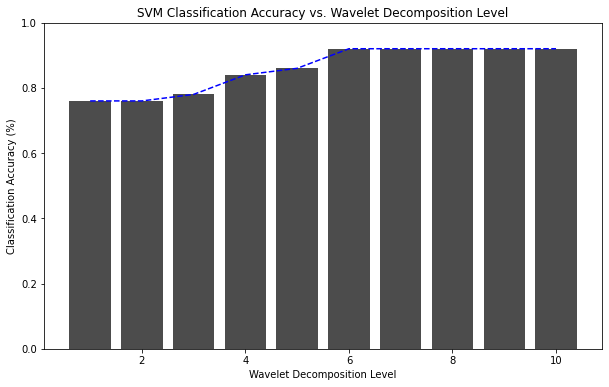

In [1]:
import numpy as np
import pandas as pd
import pywt
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Function to compute energy and entropy of wavelet coefficients
def compute_energy_entropy(coeffs):
    energy = np.sum(np.square(coeffs))
    entropy = -np.sum(np.square(coeffs) * np.log2(np.square(coeffs) + 1e-12))
    return energy, entropy

# Folder paths for each set
folder_paths = {
    'B': './data/O',  # Path to Set B (normal)
    'E': './data/S'   # Path to Set E (epileptic)
}

# Maximum decomposition level to explore
max_level = 10
accuracies = []

# Iterate over each decomposition level
for level in range(1, max_level + 1):
    # List to store feature vectors for all samples
    feature_vectors = []
    labels = []

    # Load and process data
    for set_name, folder_path in folder_paths.items():
        txt_files = glob.glob(os.path.join(folder_path, "*.txt"))
        
        for file in txt_files:
            data = pd.read_csv(file, delimiter="\t", header=None)
            eeg_data = data[0].values

            # Apply wavelet decomposition up to the current level
            coeffs = pywt.wavedec(eeg_data, 'coif1', level=level)
            
            # Initialize a feature vector for the current sample
            feature_vector = []
            
            # Extract features for each decomposition level up to the current one
            for i in range(1, level + 1):
                energy, entropy = compute_energy_entropy(coeffs[i])
                #feature_vector.extend([energy, entropy])
                feature_vector.extend([energy])# Append energy and entropy
                
            # Append the feature vector and label for the current sample
            feature_vectors.append(feature_vector)
            labels.append(0 if set_name == 'B' else 1)

    # Convert feature vectors and labels to numpy arrays
    X = np.array(feature_vectors)
    y = np.array(labels)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train an SVM classifier
    svm_clf = SVC(kernel='rbf', random_state=42)
    svm_clf.fit(X_train, y_train)

    # Evaluate the classifier
    y_pred = svm_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot accuracy vs decomposition level
plt.figure(figsize=(10, 6))
plt.bar(range(1, max_level + 1), accuracies, color='black', alpha=0.7)
plt.plot(range(1, max_level + 1), accuracies, 'b--')
plt.xlabel("Wavelet Decomposition Level")
plt.ylabel("Classification Accuracy (%)")
plt.title("SVM Classification Accuracy vs. Wavelet Decomposition Level")
plt.ylim(0, 1)
plt.show()

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\pywt\_multilevel.py:45: UserWarning: Level value of 10 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


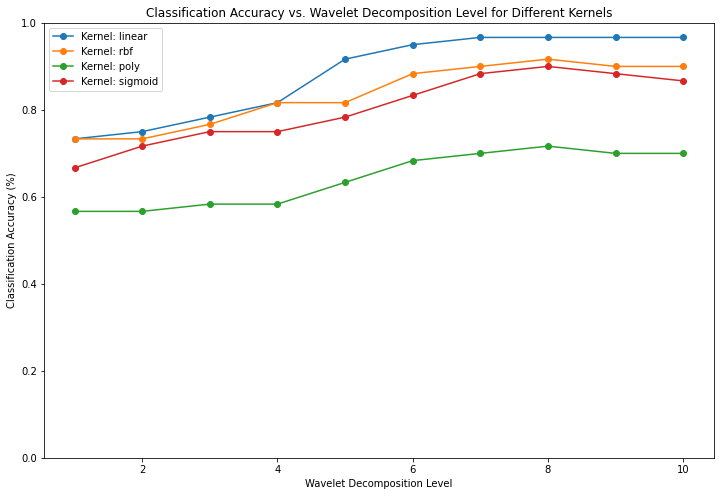

In [2]:
import numpy as np
import pandas as pd
import pywt
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Function to compute energy and entropy of wavelet coefficients
def compute_energy(coeffs):
    return np.sum(np.square(coeffs))

def compute_entropy(coeffs):
    return -np.sum(np.square(coeffs) * np.log2(np.square(coeffs) + 1e-12))

# Folder paths for each set
folder_paths = {
    'B': './data/O',  # Path to Set B (normal)
    'E': './data/S'   # Path to Set E (epileptic)
}

# Maximum decomposition level to explore
max_level = 10

# Choose which features to add: "energy" and/or "entropy"
selected_features = ["energy", "entropy"]  # Modify this list to select features

# Kernels to try with SVM
kernels = ['linear', 'rbf', 'poly', 'sigmoid']  # Modify this list to select kernels

# Dictionary to store accuracies for each kernel
accuracies = {kernel: [] for kernel in kernels}

# Iterate over each decomposition level
for level in range(1, max_level + 1):
    # List to store feature vectors for all samples
    feature_vectors = []
    labels = []

    # Load and process data
    for set_name, folder_path in folder_paths.items():
        txt_files = glob.glob(os.path.join(folder_path, "*.txt"))
        
        for file in txt_files:
            data = pd.read_csv(file, delimiter="\t", header=None)
            eeg_data = data[0].values

            # Apply wavelet decomposition up to the current level
            coeffs = pywt.wavedec(eeg_data, 'coif1', level=level)
            
            # Initialize a feature vector for the current sample
            feature_vector = []
            
            # Extract selected features for each decomposition level up to the current one
            for i in range(1, level + 1):
                if "energy" in selected_features:
                    energy = compute_energy(coeffs[i])
                    feature_vector.append(energy)
                if "entropy" in selected_features:
                    entropy = compute_entropy(coeffs[i])
                    feature_vector.append(entropy)
                
            # Append the feature vector and label for the current sample
            feature_vectors.append(feature_vector)
            labels.append(0 if set_name == 'B' else 1)

    # Convert feature vectors and labels to numpy arrays
    X = np.array(feature_vectors)
    y = np.array(labels)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train and evaluate an SVM classifier for each kernel
    for kernel in kernels:
        svm_clf = SVC(kernel=kernel, random_state=42)
        svm_clf.fit(X_train, y_train)

        # Evaluate the classifier
        y_pred = svm_clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[kernel].append(accuracy)

# Plot accuracy vs decomposition level for each kernel
plt.figure(figsize=(12, 8))
for kernel in kernels:
    plt.plot(range(1, max_level + 1), accuracies[kernel], label=f'Kernel: {kernel}', marker='o')

plt.xlabel("Wavelet Decomposition Level")
plt.ylabel("Classification Accuracy (%)")
plt.title("Classification Accuracy vs. Wavelet Decomposition Level for Different Kernels")
plt.ylim(0, 1)
plt.legend()
plt.show()


c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\pywt\_multilevel.py:45: UserWarning: Level value of 10 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


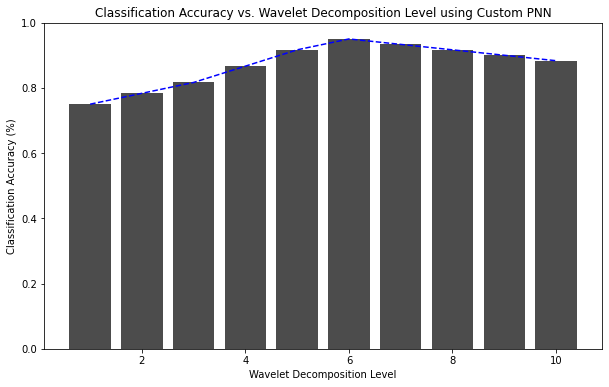

In [4]:
import numpy as np
import pandas as pd
import pywt
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

# Function to compute energy and entropy of wavelet coefficients
def compute_energy(coeffs):
    return np.sum(np.square(coeffs))

def compute_entropy(coeffs):
    return -np.sum(np.square(coeffs) * np.log2(np.square(coeffs) + 1e-12))

# Folder paths for each set
folder_paths = {
    'B': './data/O',  # Path to Set B (normal)
    'E': './data/S'   # Path to Set E (epileptic)
}

# Maximum decomposition level to explore
max_level = 10

# Choose which features to add: "energy" and/or "entropy"
selected_features = ["energy", "entropy"]  # Modify this list to select features

# Define a custom PNN class
class ProbabilisticNeuralNetwork:
    def __init__(self, sigma=0.1):
        self.sigma = sigma
        self.classes_ = None
        self.class_samples_ = {}
    
    def fit(self, X, y):
        self.classes_ = np.unique(y)
        for cls in self.classes_:
            self.class_samples_[cls] = X[y == cls]

    def predict(self, X):
        predictions = []
        for x in X:
            probs = []
            for cls in self.classes_:
                samples = self.class_samples_[cls]
                # Compute Gaussian PDF for each sample in this class
                likelihoods = [multivariate_normal(mean=s, cov=self.sigma**2).pdf(x) for s in samples]
                probs.append(np.mean(likelihoods))  # Average likelihoods for class
            predictions.append(self.classes_[np.argmax(probs)])
        return np.array(predictions)

# List to store accuracy at each decomposition level
accuracies = []

# Iterate over each decomposition level
for level in range(1, max_level + 1):
    # List to store feature vectors for all samples
    feature_vectors = []
    labels = []

    # Load and process data
    for set_name, folder_path in folder_paths.items():
        txt_files = glob.glob(os.path.join(folder_path, "*.txt"))
        
        for file in txt_files:
            data = pd.read_csv(file, delimiter="\t", header=None)
            eeg_data = data[0].values

            # Apply wavelet decomposition up to the current level
            coeffs = pywt.wavedec(eeg_data, 'coif1', level=level)
            
            # Initialize a feature vector for the current sample
            feature_vector = []
            
            # Extract selected features for each decomposition level up to the current one
            for i in range(1, level + 1):
                if "energy" in selected_features:
                    energy = compute_energy(coeffs[i])
                    feature_vector.append(energy)
                if "entropy" in selected_features:
                    entropy = compute_entropy(coeffs[i])
                    feature_vector.append(entropy)
                
            # Append the feature vector and label for the current sample
            feature_vectors.append(feature_vector)
            labels.append(0 if set_name == 'B' else 1)

    # Convert feature vectors and labels to numpy arrays
    X = np.array(feature_vectors)
    y = np.array(labels)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train a Probabilistic Neural Network (PNN)
    pnn = ProbabilisticNeuralNetwork(sigma=0.1)
    pnn.fit(X_train, y_train)

    # Predict and evaluate the classifier
    y_pred = pnn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot accuracy vs decomposition level
plt.figure(figsize=(10, 6))
plt.bar(range(1, max_level + 1), accuracies, color='black', alpha=0.7)
plt.plot(range(1, max_level + 1), accuracies, 'b--')
plt.xlabel("Wavelet Decomposition Level")
plt.ylabel("Classification Accuracy (%)")
plt.title("Classification Accuracy vs. Wavelet Decomposition Level using Custom PNN")
plt.ylim(0, 1)
plt.show()


c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\pywt\_multilevel.py:45: UserWarning: Level value of 10 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


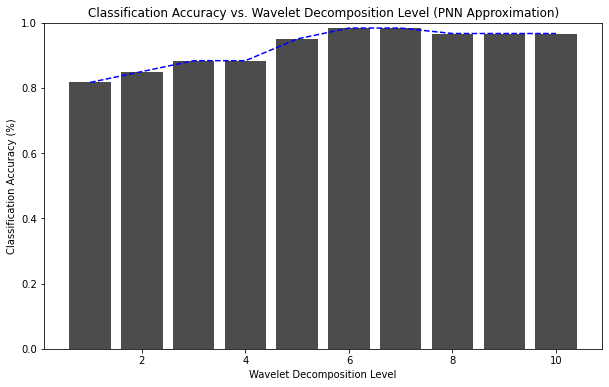

In [5]:
import numpy as np
import pandas as pd
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KernelDensity
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Function to compute energy and entropy of wavelet coefficients
def compute_energy_entropy(coeffs):
    energy = np.sum(np.square(coeffs))
    entropy = -np.sum(np.square(coeffs) * np.log2(np.square(coeffs) + 1e-12))
    return energy, entropy

# Folder paths for each set
folder_paths = {
    'B': './data/O',  # Path to Set B (normal)
    'E': './data/S'   # Path to Set E (epileptic)
}

# Maximum decomposition level to explore
max_level = 10
accuracies = []

# Iterate over each decomposition level
for level in range(1, max_level + 1):
    # List to store feature vectors for all samples
    feature_vectors = []
    labels = []

    # Load and process data
    for set_name, folder_path in folder_paths.items():
        txt_files = glob.glob(os.path.join(folder_path, "*.txt"))
        
        for file in txt_files:
            data = pd.read_csv(file, delimiter="\t", header=None)
            eeg_data = data[0].values

            # Apply wavelet decomposition up to the current level
            coeffs = pywt.wavedec(eeg_data, 'coif1', level=level)
            
            # Initialize a feature vector for the current sample
            feature_vector = []
            
            # Extract features for each decomposition level up to the current one
            for i in range(1, level + 1):
                energy, entropy = compute_energy_entropy(coeffs[i])
                feature_vector.extend([energy, entropy])  # Append energy and entropy
                
            # Append the feature vector and label for the current sample
            feature_vectors.append(feature_vector)
            labels.append(0 if set_name == 'B' else 1)

    # Convert feature vectors and labels to numpy arrays
    X = np.array(feature_vectors)
    y = np.array(labels)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Estimate density for each class using KernelDensity
    kde_normal = KernelDensity(kernel='gaussian', bandwidth=1.0).fit(X_train[y_train == 0])
    kde_epileptic = KernelDensity(kernel='gaussian', bandwidth=1.0).fit(X_train[y_train == 1])

    # Calculate log density scores
    log_density_normal = kde_normal.score_samples(X_test)
    log_density_epileptic = kde_epileptic.score_samples(X_test)

    # Combine density estimates with Gaussian Naive Bayes for probabilistic classification
    combined_log_density = np.vstack([log_density_normal, log_density_epileptic]).T
    gnb = GaussianNB()
    gnb.fit(combined_log_density, y_test)  # Fit with the test data's density estimates for demonstration

    # Predict labels and calculate accuracy
    y_pred = gnb.predict(combined_log_density)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot accuracy vs decomposition level
plt.figure(figsize=(10, 6))
plt.bar(range(1, max_level + 1), accuracies, color='black', alpha=0.7)
plt.plot(range(1, max_level + 1), accuracies, 'b--')
plt.xlabel("Wavelet Decomposition Level")
plt.ylabel("Classification Accuracy (%)")
plt.title("Classification Accuracy vs. Wavelet Decomposition Level (PNN Approximation)")
plt.ylim(0, 1)
plt.show()


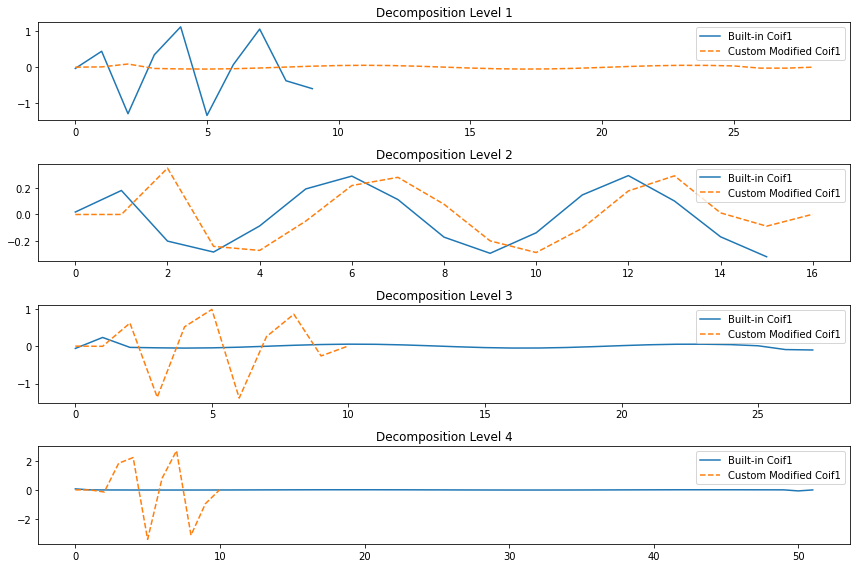

Epoch 1/40
11/11 [==============================] - 5s 85ms/step - loss: 0.3177 - accuracy: 0.8810 - val_loss: 0.5780 - val_accuracy: 0.9643
Epoch 2/40
11/11 [==============================] - 0s 24ms/step - loss: 0.0229 - accuracy: 0.9970 - val_loss: 0.5145 - val_accuracy: 0.9762
Epoch 3/40
11/11 [==============================] - 0s 24ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.4588 - val_accuracy: 0.9643
Epoch 4/40
11/11 [==============================] - 0s 24ms/step - loss: 0.0176 - accuracy: 0.9881 - val_loss: 0.4400 - val_accuracy: 0.9762
Epoch 5/40
11/11 [==============================] - 0s 25ms/step - loss: 0.0268 - accuracy: 0.9851 - val_loss: 0.3933 - val_accuracy: 0.8810
Epoch 6/40
11/11 [==============================] - 0s 24ms/step - loss: 0.0325 - accuracy: 0.9911 - val_loss: 0.3504 - val_accuracy: 0.9524
Epoch 7/40
11/11 [==============================] - 0s 24ms/step - loss: 0.0442 - accuracy: 0.9821 - val_loss: 0.3157 - val_accuracy: 0.8929
Epoch 8/40
11

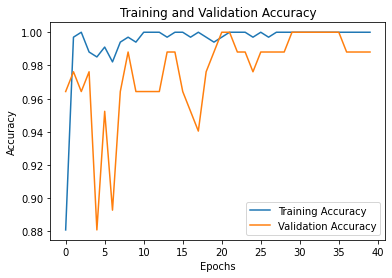

In [6]:
import numpy as np
import pandas as pd
import pywt
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from scipy.stats import kurtosis, skew
import matplotlib.pyplot as plt  # Import earlier

# Step 1: Custom modification to Coif1 wavelet
coif1 = pywt.Wavelet('coif1')
original_dec_lo = np.array(coif1.dec_lo)
modified_dec_lo = original_dec_lo * (1 + 0.1 * (-1)**np.arange(len(original_dec_lo)))

def custom_wavelet_decomposition(data, level=4):
    coeffs = []
    signal = data.copy()
    for _ in range(level):
        approx = np.convolve(signal, modified_dec_lo, mode='full')[::2]
        detail = np.convolve(signal, coif1.dec_hi, mode='full')[::2]
        coeffs.append(detail)
        signal = approx
    coeffs.append(signal)
    return coeffs

sample_signal = np.sin(np.linspace(0, 4 * np.pi, 100))
coif1_coeffs = pywt.wavedec(sample_signal, 'coif1', level=4)
custom_coeffs = custom_wavelet_decomposition(sample_signal, level=4)

plt.figure(figsize=(12, 8))
for i in range(1, 5):
    plt.subplot(4, 1, i)
    plt.plot(coif1_coeffs[i], label='Built-in Coif1')
    plt.plot(custom_coeffs[i], label='Custom Modified Coif1', linestyle='dashed')
    plt.title(f'Decomposition Level {i}')
    plt.legend()
plt.tight_layout()
plt.show()

# Function to compute energy and entropy, and add RMS, kurtosis, and skewness
def compute_features(coeffs):
    features = []
    for coeff in coeffs[1:]:  # Skip the approximation coefficients
        energy = np.sum(np.square(coeff))
        entropy = -np.sum(np.square(coeff) * np.log2(np.square(coeff) + 1e-12))
        rms = np.sqrt(np.mean(coeff**2))
        kurt = kurtosis(coeff)
        sk = skew(coeff)
        features.extend([energy, entropy, rms, kurt, sk])
    return features

# Folder paths for each set
folder_paths = {
    'B': './data/O',  # Path to Set B (normal)
    'E': './data/S'   # Path to Set E (epileptic)
}

# Parameters
wavelet = 'coif1'
decomp_level = 8
augment_factor = 3  # Augment data to increase robustness

# Prepare the data
X = []
y = []
max_level = 5
for label, folder in folder_paths.items():
    txt_files = glob.glob(os.path.join(folder, "*.txt"))
    for file in txt_files:
        data = pd.read_csv(file, delimiter="\t", header=None).values.flatten()
        
        # Apply wavelet decomposition
        coeffs = custom_wavelet_decomposition(data, level=max_level)
        features = compute_features(coeffs)
        
        # Append the original and augmented data
        for _ in range(augment_factor):  # Data augmentation
            noise = np.random.normal(0, 0.01, size=len(features))
            X.append(features + noise)
            y.append(0 if label == 'B' else 1)

# Convert to NumPy arrays and standardize
X = np.array(X)
y = np.array(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reshape for TCN (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the TCN model
model = Sequential([
    Conv1D(64, 3, dilation_rate=1, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    Dropout(0.3),
    Conv1D(128, 3, dilation_rate=2, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Conv1D(256, 3, dilation_rate=4, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Set early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2,
                    epochs=40, batch_size=32, callbacks=[early_stopping], verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\pywt\_multilevel.py:45: UserWarning: Level value of 10 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


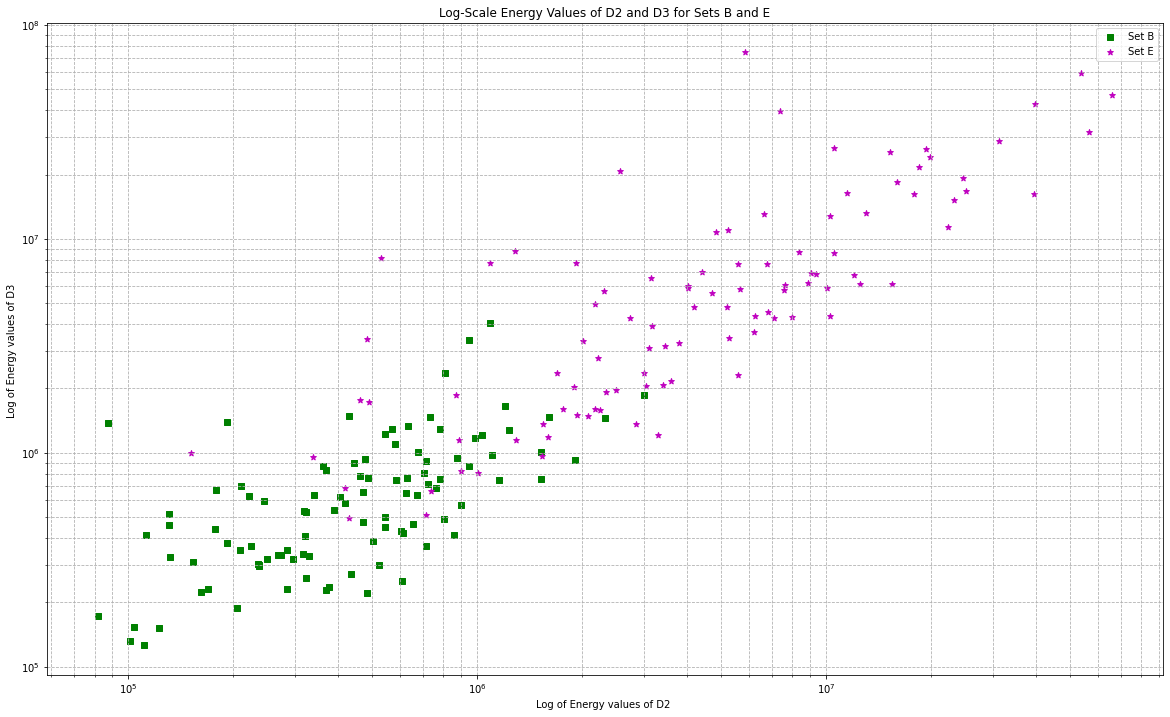

In [7]:
import pywt
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

# Folder paths for each set
folder_paths = {
    'A': './data/Z',  # Z000.txt - Z100.txt
    'B': './data/O',  # O000.txt - O100.txt
    'C': './data/N',  # N000.txt - N100.txt
    'D': './data/F',  # F000.txt - F100.txt
    'E': './data/S'   # S000.txt - S100.txt
}

# Sampling frequency (used to interpret the frequency bands)
fs = 86.8  # Adjust to match the dataset's sampling rate

# Function to compute energy and entropy
def compute_energy_entropy(coeffs):
    energy = np.sum(np.square(coeffs))
    entropy = -np.sum(np.square(coeffs) * np.log2(np.square(coeffs) + 1e-12))  # add small value to avoid log(0)
    return energy, entropy

# Dictionary to store results for each set
all_results = {
    'Set': [],
    'Energy_D2': [],
    'Entropy_D2': [],
    'Energy_D3': [],
    'Entropy_D3': []
}

# Iterate through each set and its corresponding folder path
for set_name, folder_path in folder_paths.items():
    txt_files = glob.glob(os.path.join(folder_path, "*.txt"))
    
    # Process each EEG file in the current set
    for file in txt_files:
        data = pd.read_csv(file, delimiter="\t", header=None)
        eeg_data = data[0].values
        
        # Apply wavelet decomposition up to the 3rd level using 'db4'
        coeffs = pywt.wavedec(eeg_data, 'db4', level=10)
        
        # Access detail coefficients at levels 2 and 3
        D2 = coeffs[2]
        D3 = coeffs[3]
        
        # Compute energy and entropy for D2 and D3
        energy_D2, entropy_D2 = compute_energy_entropy(D2)
        energy_D3, entropy_D3 = compute_energy_entropy(D3)
        
        # Append results
        all_results['Set'].append(set_name)
        all_results['Energy_D2'].append(energy_D2)
        all_results['Entropy_D2'].append(entropy_D2)
        all_results['Energy_D3'].append(energy_D3)
        all_results['Entropy_D3'].append(entropy_D3)

# Convert results to a DataFrame
results_df = pd.DataFrame(all_results)

# Filter the DataFrame to include only sets B and E
filtered_df = results_df[results_df['Set'].isin(['B', 'E'])]

# Plot energy values for D2 and D3 for sets B and E in a scatter plot with log scale
plt.figure(figsize=(20, 12))
for set_name, marker, color in zip(['B', 'E'], ['s', '*'], ['g', 'm']):
    subset = filtered_df[filtered_df['Set'] == set_name]
    plt.scatter(subset['Energy_D2'], subset['Energy_D3'], label=f'Set {set_name}', marker=marker, color=color)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Log of Energy values of D2 ')
plt.ylabel('Log of Energy values of D3 ')
plt.title('Log-Scale Energy Values of D2 and D3 for Sets B and E')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()